In [1]:
import random
from quantumnet.components import Network, Host
from quantumnet.components import ServerNode, ClientNode, RegularNode
from quantumnet.objects import Qubit, Logger


Hosts inicializados
Canais inicializados
Pares EPRs adicionados


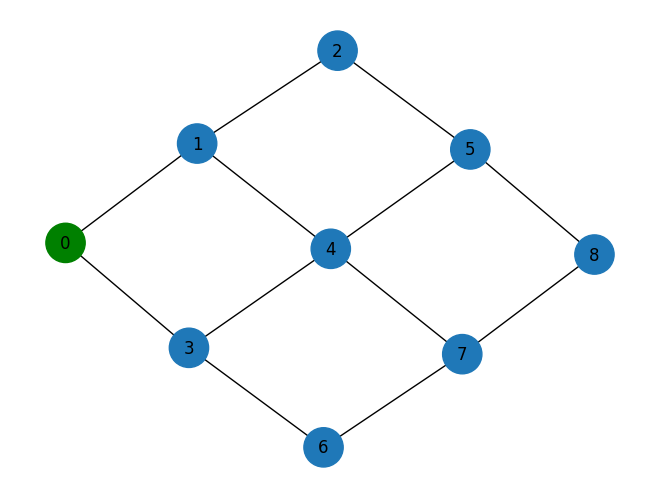

In [2]:
rede = Network()
rede.set_ready_topology('grade',8,3,3)  # grade 3x3 com  clientes e 1 servidor
rede.draw()
Logger.activate(Logger)

In [3]:
# quantum_circuit, num_qubits, circuit_depth = rede.generate_random_circuit(num_qubits=4, num_gates=20)
rede.application_layer.run_app("AC_BQC", alice_id=6, bob_id=0, num_qubits=4,scenario=2,circuit_depth=4)

2025-04-27 10:18:38,936: Timeslot 0: Iniciando protocolo Andrew Childs entre Alice 6 e Bob 0.
2025-04-27 10:18:38,937: Limpando a memória do cliente (Alice) antes de iniciar o protocolo.
2025-04-27 10:18:38,938: Limpando a memória do servidor (Bob) antes de iniciar o protocolo.
2025-04-27 10:18:38,940: Cliente criou 4 qubits para a transmissão.
2025-04-27 10:18:38,940: Qubit 472 registrado no timeslot 0
2025-04-27 10:18:38,941: Qubit 66 registrado no timeslot 0
2025-04-27 10:18:38,942: Qubit 627 registrado no timeslot 0
2025-04-27 10:18:38,942: Qubit 468 registrado no timeslot 0
2025-04-27 10:18:38,943: Qubit 472 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 10:18:38,943: Qubit 66 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 10:18:38,944: Qubit 627 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 10:18:38,945: Qubit 468 criado pelo Cliente - Estado: 0, Fase: 1
2025-04-27 10:18:38,947: Alice recebeu 4 qubits. Total: 4 qubits na memória.
2025-04-27 10:18:38,948: Instruçõe

Treinando VQC...


QiskitMachineLearningError: 'Sampler job failed: \'Number of qubits 127 is greater than maximum (24) for "basic_simulator".\''